------
## Podsumowanie

In [1]:
import pandas as pd
import numpy as np

In [2]:
# generowanie przykłądowych danych
np.random.seed(42)
dane = np.random.normal(loc=70, scale=10, size=30)  # loc - średnia, scale - odchylenie

In [3]:
df = pd.DataFrame({"Wynik": dane})
print("Dane:", df.head())

Dane:        Wynik
0  74.967142
1  68.617357
2  76.476885
3  85.230299
4  67.658466


In [4]:
srednia = df['Wynik'].mean()
mediana = df['Wynik'].median()
dominanta = df["Wynik"].mode()[0]

In [5]:
print(f"Średnia:", srednia)
print(f"Mediana:", mediana)
print(f"Dominanta:", dominanta)  # wartość najcześćiej wystepujaca

Średnia: 68.11853104148962
Mediana: 67.65854834163741
Dominanta: 50.86719755342202


In [6]:
wariancja = df["Wynik"].var()
odch_stand = df['Wynik'].std()
roztep = df['Wynik'].max() - df["Wynik"].min()

In [7]:
print(f"Wariancja:", wariancja)
print(f"Odchylenie standardowe:", odch_stand)
print(f"Rozstęp:", roztep)

Wariancja: 81.00115693656517
Odchylenie standardowe: 9.000064274024112
Rozstęp: 34.924930601651894


In [8]:
print(f"Wariancja: {wariancja:.2f}")
print(f"Odchylenie standardowe: {odch_stand:.2f}")
print(f"Rozstęp: {roztep:.2f}")

Wariancja: 81.00
Odchylenie standardowe: 9.00
Rozstęp: 34.92


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram wyników')

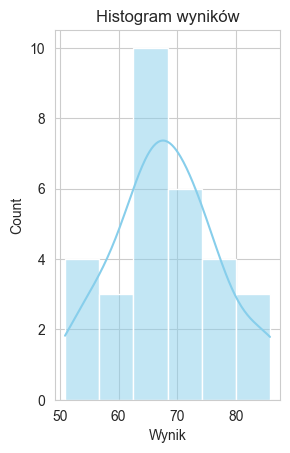

In [11]:
plt.subplot(1, 2, 1)
sns.histplot(df["Wynik"], kde=True, color="skyblue")
plt.title("Histogram wyników")

Text(0.5, 1.0, 'Wykres pudełkowy (boxplot)')

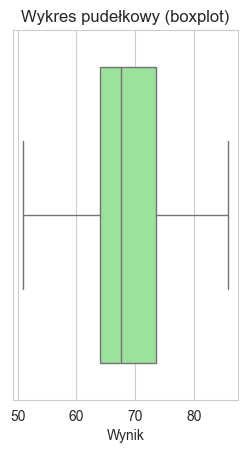

In [13]:
# wykres ramka-wąsy
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Wynik"], color="lightgreen")
plt.title("Wykres pudełkowy (boxplot)")


In [15]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [17]:
normal = np.random.normal(50, 5, 100)
# z outlierami
outliers = np.append(normal, [200, 220, 240])

In [18]:
df = pd.DataFrame({
    "Bez_outlierow": normal,
    "z_outlierami": outliers[:100]  # dopasowanie wielkości
})

In [19]:
for col in df.columns:
    print(f"---{col}---")
    print(f"Średnia: {df[col].mean()}")
    print(f"Mediana: {df[col].median()}")
    print(f"Dominanta: {df[col].mode()[0]}")

---Bez_outlierow---
Średnia: 50.763973888101
Mediana: 51.18307912854118
Dominanta: 37.82581117946431
---z_outlierami---
Średnia: 50.763973888101
Mediana: 51.18307912854118
Dominanta: 37.82581117946431


In [21]:
print(df["Bez_outlierow"].mode())

0     37.825811
1     40.518195
2     40.710091
3     41.862808
4     41.921138
        ...    
95    59.523294
96    59.835509
97    60.934898
98    60.953499
99    62.641629
Name: Bez_outlierow, Length: 100, dtype: float64


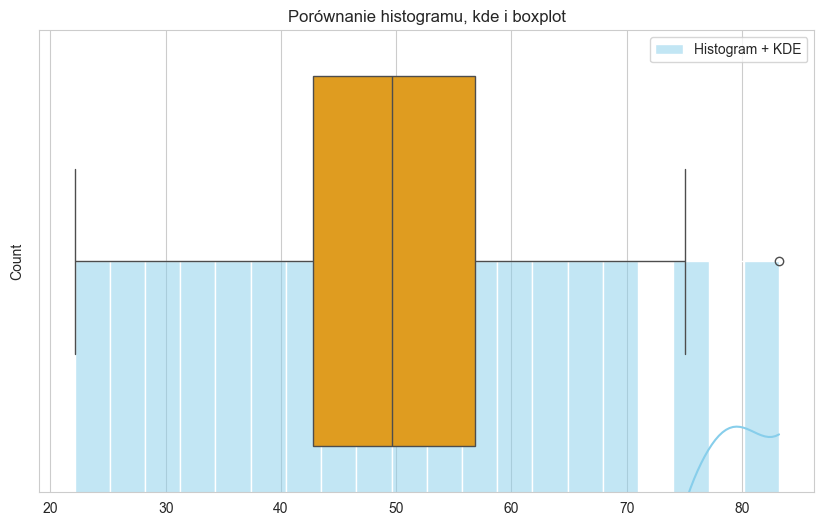

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.normal(50, 10, 200)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color="skyblue", bins=20, label="Histogram + KDE")
sns.boxplot(x=data, color="orange")
plt.legend()
plt.title("Porównanie histogramu, kde i boxplot")
plt.show()

In [28]:
groupA = np.random.normal(70, 5, 100)
groupB = np.random.normal(65, 10, 100)

In [31]:
df = pd.DataFrame({"Grupa":  ["A"]*100 + ["B"]*100, "Wynik": np.concatenate([groupA, groupB])})

C:\Users\CSComarch\AppData\Local\Temp\ipykernel_13844\1559278141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")


Text(0.5, 1.0, 'Porównanie wyników dwóch grup')

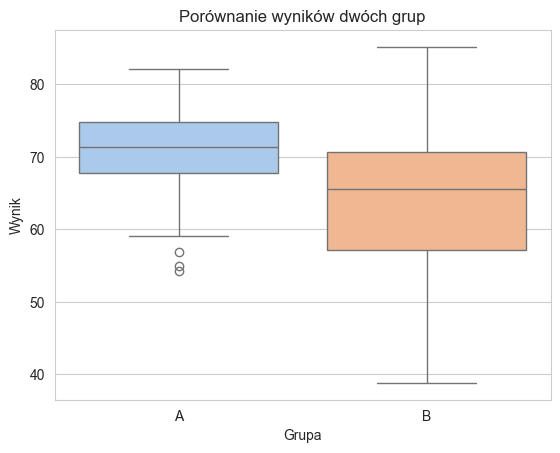

In [33]:
sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")
plt.title("Porównanie wyników dwóch grup")